In [ ]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../src')
from RemoveOutliers import remove_outliers


In [82]:
df = pd.read_csv('../../data/X_train_cleaned.csv')

In [83]:
df.shape

(22481, 12)

In [84]:
var_num = df.select_dtypes(include=['int64', 'float64'])
var_cat = df.select_dtypes(include=['object','category'])

In [85]:
var_num

,AgeConducteur,BonusMalus,AgeVehicule,PrimeCommerciale
0,40.0,50.0,6.0,350.0
1,46.0,50.0,2.0,529.2
2,37.0,50.0,10.0,145.3
3,51.0,50.0,5.0,213.6
4,29.0,80.0,10.0,296.2
...,...,...,...,...
22476,51.0,50.0,6.0,307.7
22477,18.0,100.0,8.0,769.6
22478,27.0,85.0,7.0,481.7
22479,37.0,70.0,6.0,176.0


In [86]:
var_num = var_num.drop(['PrimeCommerciale'], axis=1)

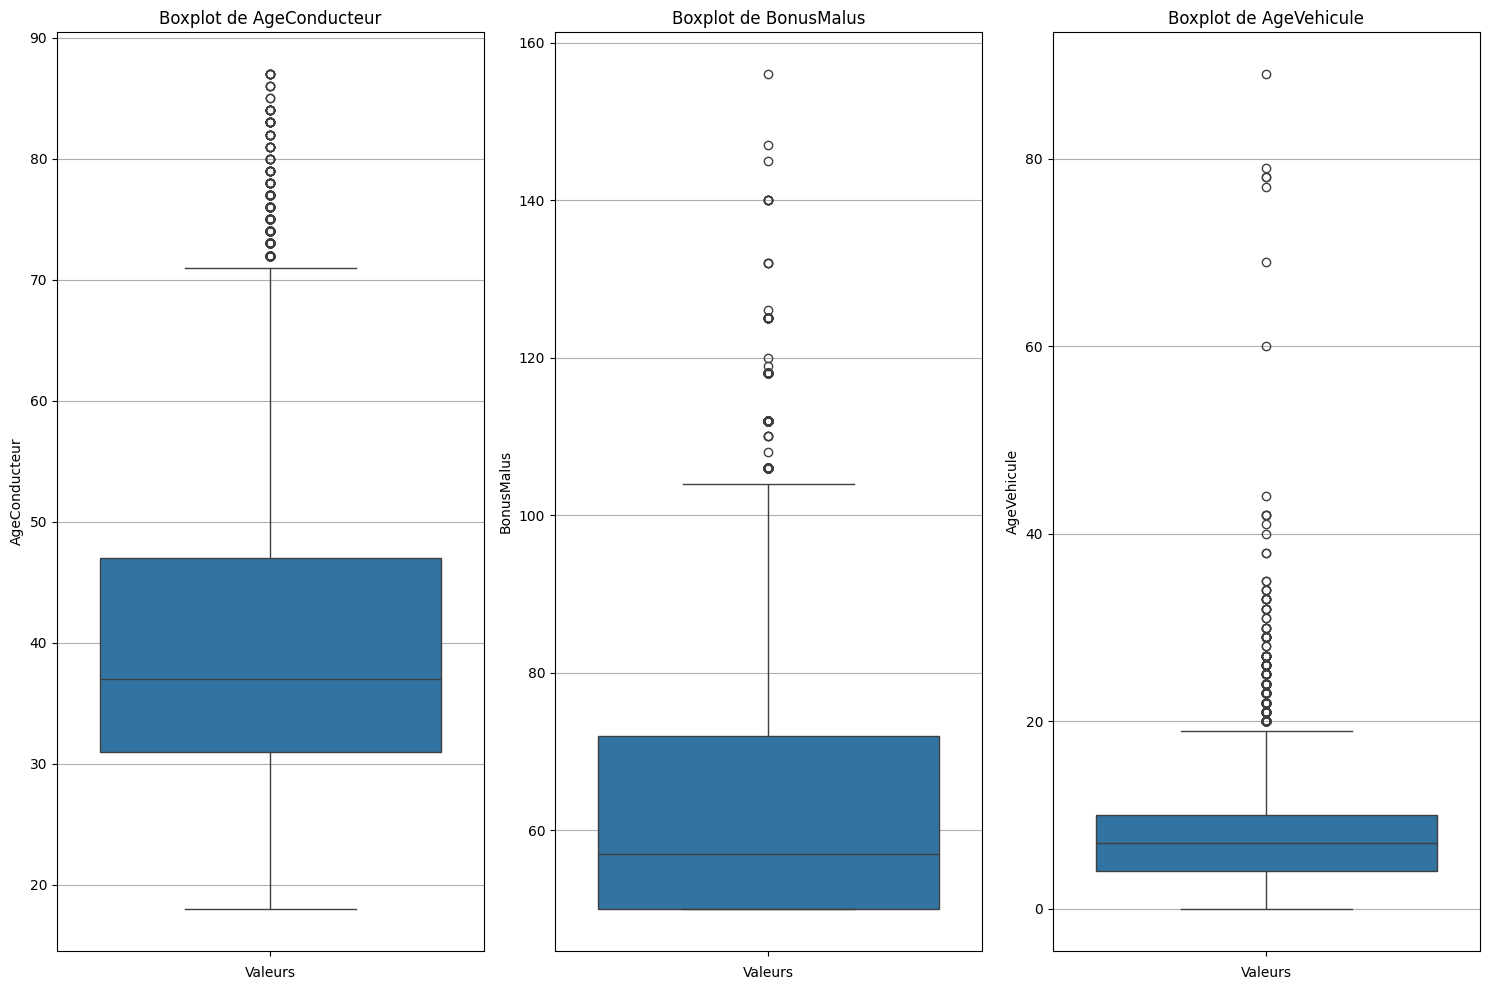

In [87]:
# Boxplot des variables
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), var_num.columns):
    sns.boxplot(y=df[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [88]:
var_num.shape

(22481, 3)

In [89]:
var_num_cleand = remove_outliers(var_num, var_num.columns)

In [90]:
var_num.shape

(22481, 3)

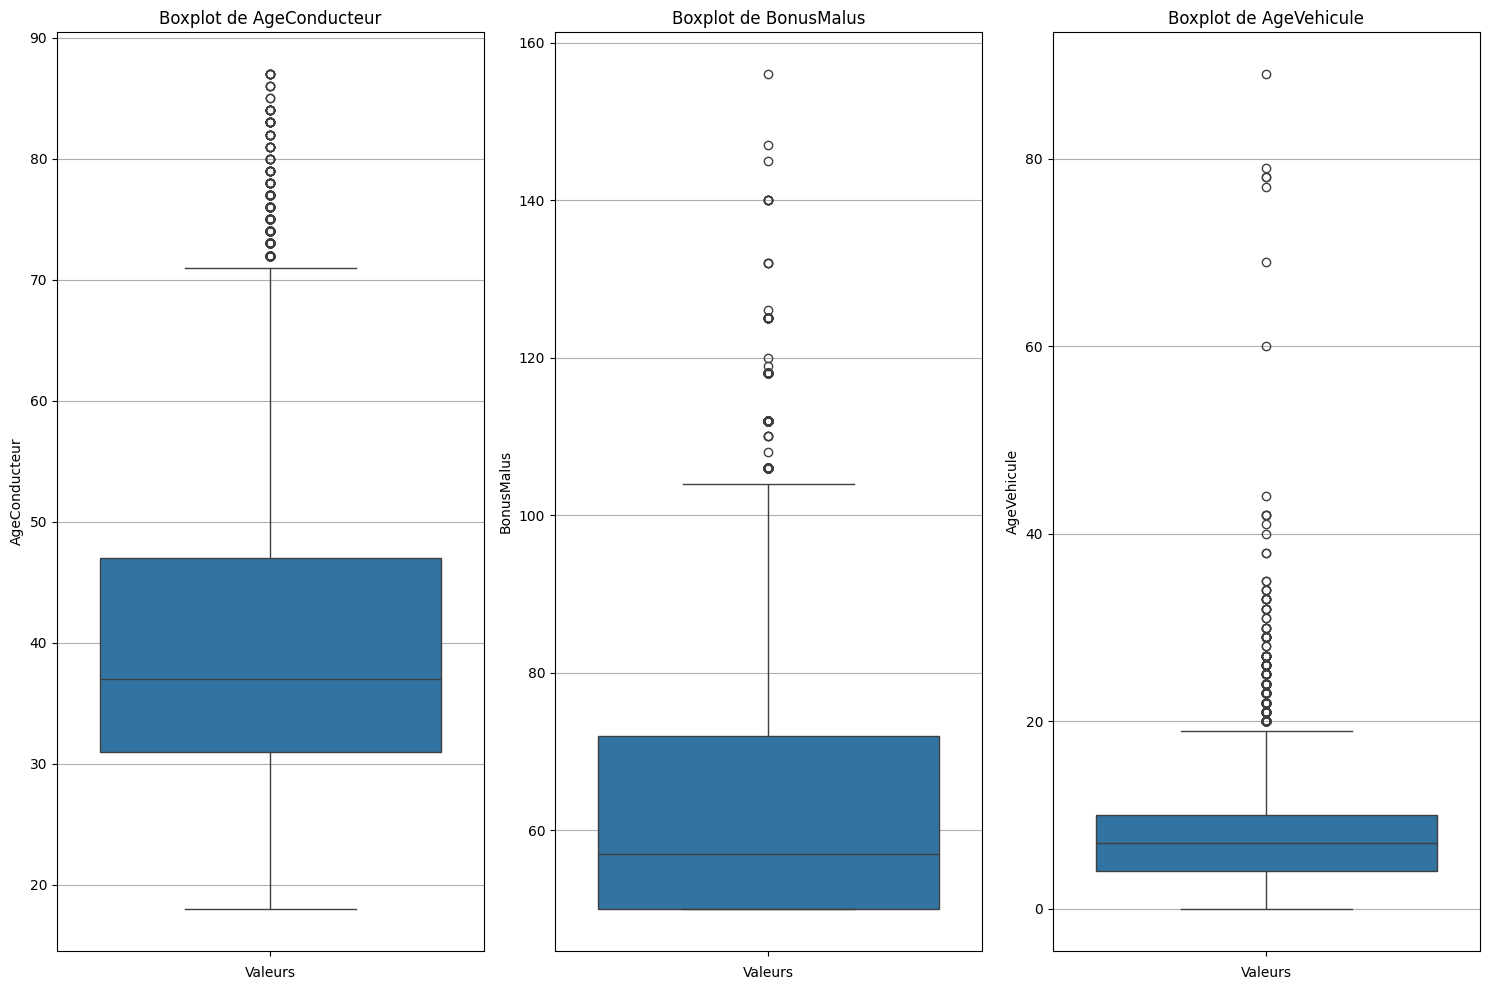

In [91]:
# Boxplot des variables
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), var_num_cleand.columns):
    sns.boxplot(y=df[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

---
Encoding 
---

In [92]:
var_cat.describe().T

,count,unique,top,freq
SexeConducteur,22481,2,M,14809
FrequencePaiement,22481,4,Half-yearly,12486
ClasseVehicule,22481,5,Cheap,18246
PuissanceVehicule,22481,15,P10,4018
CarburantVehicule,22481,2,Regular,13600
UsageVehicule,22481,2,Private+trip to office,21830
Garage,22481,4,Closed zbox,11311
Region,22481,4,Center,11946


In [93]:
df['FrequencePaiement'].value_counts()

FrequencePaiement
Half-yearly    12486
Annual          7680
Quarterly       1709
Monthly          606
Name: count, dtype: int64

In [ ]:
# save dataset after preprocessing
#f.to_csv('../../data/X_train_preprocessed.csv', index=False)